<a href="https://colab.research.google.com/github/somsisas/Funstagram/blob/main/faceRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition
!pip install cmake
!pip install dlib
!pip install face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=14d687f8070d1d8b7f11852b6eefff4d29049211a86c9477e8f4284f988400f5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 947.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
!mkdir known
!wget https://i.pinimg.com/736x/3f/66/c3/3f66c309c4eb74a8668bb4478ae21751.jpg -O known/ronaldo.jpg
!wget https://www.telegraph.co.uk/content/dam/events/longread/TELEMMGLPICT000324143613_trans_NvBQzQNjv4BqqVzuuqpFlyLIwiB6NTmJwfSVWeZ_vEN7c6bHu2jJnT8%204.jpg -O known/haaland.jpg
!wget https://images2.minutemediacdn.com/image/upload/c_fill,w_720,ar_16:9,f_auto,q_auto,g_auto/shape/cover/sport/let_kevin_de_bruyne_talk___the_turning_point-1ab24a5f934c2722495780a848aee4dc.jpg -O known/debruyne.jpg
!wget https://b.fssta.com/uploads/application/soccer/headshots/2252.vresize.350.350.medium.82.png -O known/kroos.jpg

--2024-09-09 22:13:54--  https://i.pinimg.com/736x/3f/66/c3/3f66c309c4eb74a8668bb4478ae21751.jpg
Resolving i.pinimg.com (i.pinimg.com)... 146.75.92.84, 2600:1406:bc00:26::1723:1a20, 2600:1406:bc00:26::1723:1a38, ...
Connecting to i.pinimg.com (i.pinimg.com)|146.75.92.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27396 (27K) [image/jpeg]
Saving to: ‘known/ronaldo.jpg’

known/ronaldo.jpg   100%[===================>]  26.75K  --.-KB/s    in 0.001s  

2024-09-09 22:13:54 (20.7 MB/s) - ‘known/ronaldo.jpg’ saved [27396/27396]

--2024-09-09 22:13:54--  https://www.telegraph.co.uk/content/dam/events/longread/TELEMMGLPICT000324143613_trans_NvBQzQNjv4BqqVzuuqpFlyLIwiB6NTmJwfSVWeZ_vEN7c6bHu2jJnT8%204.jpg
Resolving www.telegraph.co.uk (www.telegraph.co.uk)... 23.222.205.88
Connecting to www.telegraph.co.uk (www.telegraph.co.uk)|23.222.205.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 325949 (318K) [image/jpeg]
Saving to: ‘known/haaland.

In [ ]:
!mkdir unknown
!wget https://i.pinimg.com/originals/23/df/9c/23df9c2d1c8a8accad85e6f232891739.jpg -O unknown/1.jpg
!wget https://img.a.transfermarkt.technology/portrait/big/418560-1709108116.png?lm=1 -O unknown/2.jpg
!wget https://sortitoutsidospaces.b-cdn.net/megapacks/cutoutfaces/originals/13.00/18004457.png -O unknown/3.png
!wget https://www.tonikroos-academy.com/wp-content/uploads/tonikroos-800x800.jpg -O unknown/4.jpg

--2024-09-09 22:14:45--  https://i.pinimg.com/originals/23/df/9c/23df9c2d1c8a8accad85e6f232891739.jpg
Resolving i.pinimg.com (i.pinimg.com)... 173.223.234.46, 173.223.234.30, 2600:1406:bc00:26::1723:1a19, ...
Connecting to i.pinimg.com (i.pinimg.com)|173.223.234.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63563 (62K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  62.07K  --.-KB/s    in 0.02s   

2024-09-09 22:14:45 (3.87 MB/s) - ‘unknown/1.jpg’ saved [63563/63563]

--2024-09-09 22:14:45--  https://img.a.transfermarkt.technology/portrait/big/418560-1709108116.png?lm=1
Resolving img.a.transfermarkt.technology (img.a.transfermarkt.technology)... 184.28.98.112, 184.28.98.82, 2600:1406:5e00:49::17ce:e5a7, ...
Connecting to img.a.transfermarkt.technology (img.a.transfermarkt.technology)|184.28.98.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283930 (277K) [image/png]
Saving to: ‘unknown

In [ ]:
!cd unknown
!wget https://i.pinimg.com/originals/23/df/9c/23df9c2d1c8a8accad85e6f232891739.jpg -O unknown/1.jpg

--2024-09-09 22:00:20--  https://i.pinimg.com/originals/23/df/9c/23df9c2d1c8a8accad85e6f232891739.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.199.34.112, 23.199.34.114, 2a04:4e42:1a::84
Connecting to i.pinimg.com (i.pinimg.com)|23.199.34.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63563 (62K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  62.07K  --.-KB/s    in 0.007s  

2024-09-09 22:00:20 (9.20 MB/s) - ‘unknown/1.jpg’ saved [63563/63563]



In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=3a770debc0bab78fb3a19e9b10985ea1867c63ce9adde4b9d137e54171ddb2a5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=6caaa2fdec1b4facb38bcf315eb9b2b249af16ca7035a8b18bb9356af4a7c205
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Processing 4.jpg


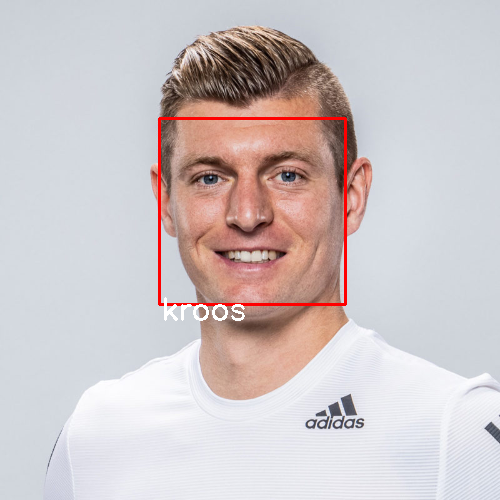

[False, True, False, False]
Processing 2.jpg


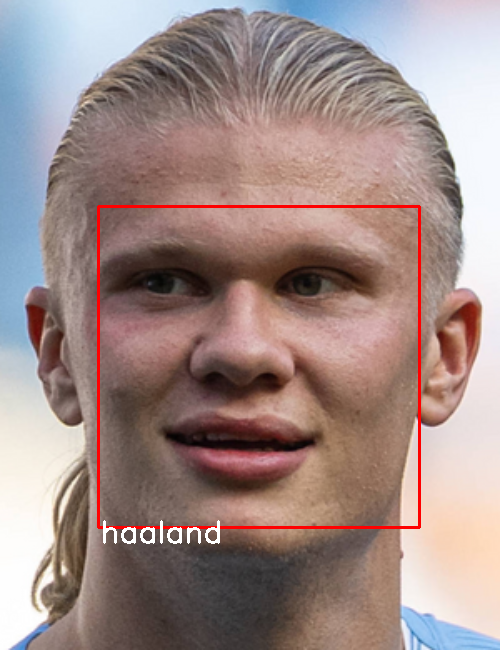

[False, False, True, False]
Processing 1.jpg


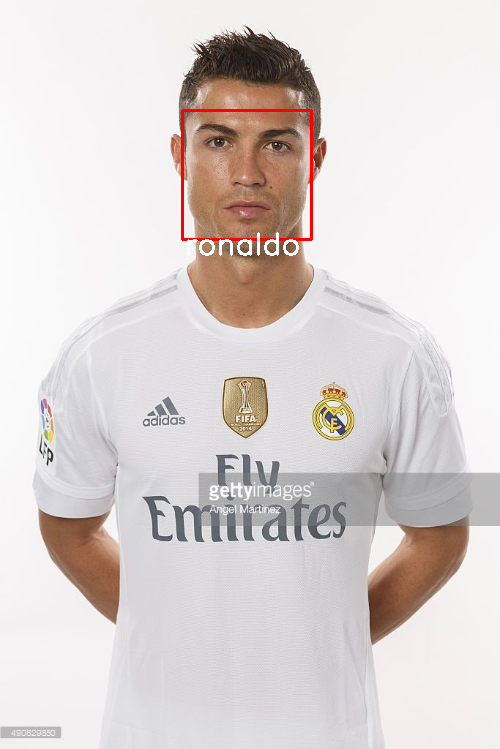

[True, False, False, False]
Processing 3.png


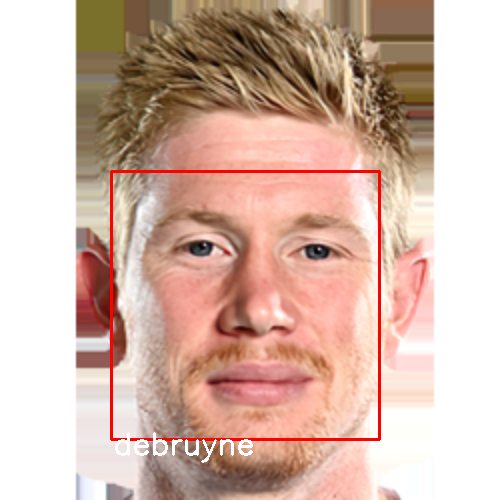

[False, False, False, True]


In [ ]:
import face_recognition
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def readImg(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))

known_faces_encodings = []
known_faces_names = []
known_faces_dir = 'known'

for name in os.listdir(known_faces_dir):
  image = readImg(known_faces_dir + '/' + name)
  face_encoding = face_recognition.face_encodings(image)[0]
  known_faces_encodings.append(face_encoding)
  known_faces_names.append(name.split('.')[0])


unknown_faces_dir = 'unknown'

for file in os.listdir(unknown_faces_dir):
  print("Processing", file)
  image = readImg(unknown_faces_dir + '/' + file)
  image_enc = face_recognition.face_encodings(image)[0]

  results = face_recognition.compare_faces(known_faces_encodings, image_enc)


  for name in known_faces_names:
    if results[known_faces_names.index(name)]:
      (top, right, bottom, left), name = face_recognition.face_locations(image)[0], name
      cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(image, name, (left + 2, bottom + 15), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
      cv2_imshow(image)

  print(results)


